In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

# Monte Carlo Simulation with examples

A Monte Carlo method is a technique that uses random numbers and probability to solve complex problems. The Monte Carlo simulation, or probability simulation, is a technique used to understand the impact of risk and uncertainty in financial sectors, project management, costs, and other forecasting machine learning models.

## 1. Con Flip Example

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rn =[]
for i in range(10000):
    rn.append(random.randint(0,1))
np.mean(rn)

0.502

In [4]:
def coin_flip():
    return random.randint(0,1)

In [5]:
rn =[]
for i in range(10000):
    rn.append(coin_flip())
np.mean(rn)

0.5092

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'probability')

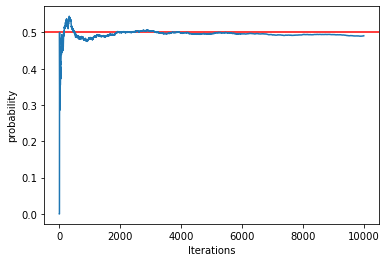

In [6]:
n = 10000
list =[]
results = 0 
for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result
    
    probability = results/(i+1)
    list.append(probability)
    
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('probability')
plt.plot(list)

In [7]:
def monte_carlo(n):
    list =[]
    results = 0 
    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result

        probability = results/(i+1)
        list.append(probability)
    
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.xlabel('Iterations')
    plt.ylabel('probability')
    plt.plot(list)
    
    return results/n

10000번 동전을 던지면 Head or Tail가 나올 확률0.5008


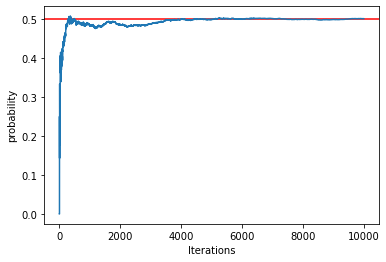

In [8]:
trials =10000
expected_value = monte_carlo(trials)
print(f'{trials}번 동전을 던지면 Head or Tail가 나올 확률{expected_value}')

## 2. Circle area calculation Example

In [9]:
n =10000
count = 0
circle_x = []; circle_y = []
rec_x = []; rec_y = []
for i in range(n):
    x = random.random()
    y = random.random()
    if ((np.square(x) + np.square(y)) < 1) :
        count= count+1
        circle_x.append(x); circle_y.append(y)
    else:
        rec_x.append(x); rec_y.append(y)

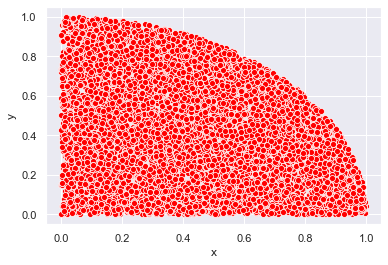

In [10]:
import pandas as pd
import seaborn as sns; sns.set()

data = pd.DataFrame(circle_x, circle_y).reset_index()
data.columns =['x', 'y']
sns.scatterplot('x', 'y', color='red', data = data)

In [11]:
from math import pi
print(f'수학적 계산에 의한 원의 면적은 {pi*1**2/4}')
print(f'몬테커를로 시뮬레이션 계산에 의한 원의 면적은 {len(data)/n}')

수학적 계산에 의한 원의 면적은 0.7853981633974483
몬테커를로 시뮬레이션 계산에 의한 원의 면적은 0.791


## 3. Practical Business Python Example
https://pbpython.com/monte-carlo.html

- One approach that can produce a better understanding of the range of potential outcomes and help avoid the “flaw of averages” is a Monte Carlo simulation. 
- to predict the range of potential values for a sales compensation budget. 


In [12]:
sns.set_style('darkgrid')

Problem Background 
- to predict how much money we should budget for sales commissions for the next year.
- Now, you have a little bit more information and go back to finance. This time finance says, “What is your confidence in this range? Also, we need you to do this for a sales force of 500 people and model several different rates to determine the amount to budget.” 
- Hmmm… Now, what do you do?

### There are two components to running a Monte Carlo simulation:

#### the equation to evaluate
#### the random variables for the input

### 3.1 계획대비 달성도(영업사원)

In [13]:
# 과거 자료를 바탕으로 100% 달성이 평균이며 표준편차는 10%, 영업사원 500명에 대해 1,000번의 몬테칼로 시율레이션
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

(array([  5.,  16.,  38.,  83.,  91., 109.,  94.,  41.,  15.,   8.]),
 array([0.7  , 0.758, 0.816, 0.874, 0.932, 0.99 , 1.048, 1.106, 1.164,
        1.222, 1.28 ]),
 <a list of 10 Patch objects>)

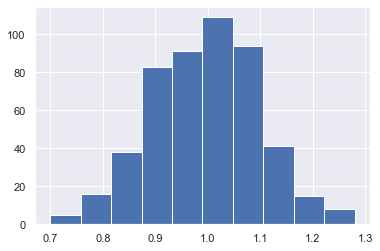

In [14]:
# 과거 자료의 정규분포를 가정한 목표 대비 달성도를 생성하고 확인
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2) # 1이면 100% 목표 달성
plt.hist(pct_to_target)

### 3.2 예상 매출액

(array([295.,   0., 100.,   0.,   0.,  50.,   0.,  31.,   0.,  24.]),
 array([ 75000., 117500., 160000., 202500., 245000., 287500., 330000.,
        372500., 415000., 457500., 500000.]),
 <a list of 10 Patch objects>)

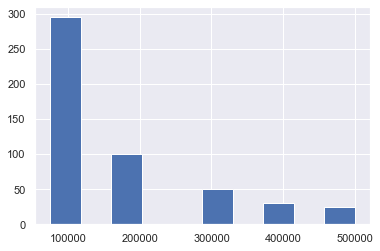

In [15]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
plt.hist(sales_target)

### 3.3 예상 매출액과 계획대비 달성도

In [16]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

df

,Pct_To_Target,Sales_Target,Sales
0,0.92,75000,69000.0
1,0.81,75000,60750.0
2,0.95,300000,285000.0
3,0.92,400000,368000.0
4,0.94,300000,282000.0
...,...,...,...
495,1.03,500000,515000.0
496,1.06,200000,212000.0
497,1.18,200000,236000.0
498,0.95,75000,71250.0


### 3.4 영업사원 commison rate(달성도에 따라 차별)

In [17]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [18]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
df

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.92,75000,69000.0,0.03,2070.0
1,0.81,75000,60750.0,0.02,1215.0
2,0.95,300000,285000.0,0.03,8550.0
3,0.92,400000,368000.0,0.03,11040.0
4,0.94,300000,282000.0,0.03,8460.0
...,...,...,...,...,...
495,1.03,500000,515000.0,0.04,20600.0
496,1.06,200000,212000.0,0.04,8480.0
497,1.18,200000,236000.0,0.04,9440.0
498,0.95,75000,71250.0,0.03,2137.5


### 3.5 몬테칼를로 시뮬레이션

In [19]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [20]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission_Amount',
                                                           'Sales_Target'])

In [21]:
results_df.describe().style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"83,814,763.0","2,862,702.21","83,792,325.0"
std,"2,768,899.8083814546","104,978.4694111312","2,728,871.508349941"
min,"75,763,500.0","2,547,578.0","75,750,000.0"
25%,"82,028,187.5","2,791,590.0","82,000,000.0"
50%,"83,804,625.0","2,863,195.0","83,800,000.0"
75%,"85,663,125.0","2,928,952.0","85,625,000.0"
max,"93,118,000.0","3,199,235.0","93,375,000.0"


(array([  9.,  37., 110., 183., 254., 212., 128.,  43.,  20.,   4.]),
 array([75763500., 77498950., 79234400., 80969850., 82705300., 84440750.,
        86176200., 87911650., 89647100., 91382550., 93118000.]),
 <a list of 10 Patch objects>)

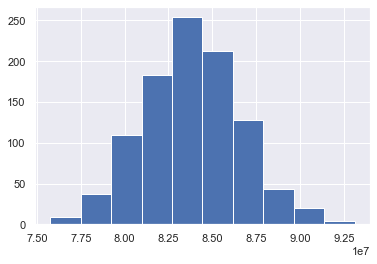

(array([ 10.,  26.,  90., 178., 235., 235., 125.,  73.,  23.,   5.]),
 array([2547578. , 2612743.7, 2677909.4, 2743075.1, 2808240.8, 2873406.5,
        2938572.2, 3003737.9, 3068903.6, 3134069.3, 3199235. ]),
 <a list of 10 Patch objects>)

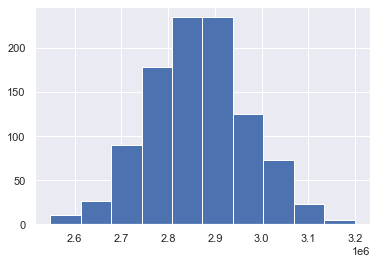

(array([  8.,  37., 116., 190., 264., 214., 113.,  43.,  10.,   5.]),
 array([75750000., 77512500., 79275000., 81037500., 82800000., 84562500.,
        86325000., 88087500., 89850000., 91612500., 93375000.]),
 <a list of 10 Patch objects>)

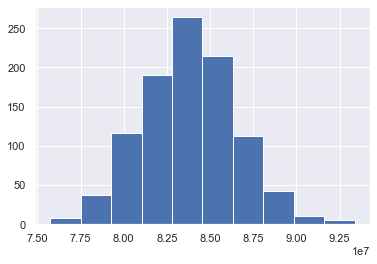

In [22]:
for col in results_df.columns:
    plt.hist(results_df[col]); plt.show()

### Now you can say the confidence Intervals in commsion budget with simulation.

## 4. 배심원정리(Condorcet's jury theorem)
https://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem

In [23]:
import warnings
warnings.filterwarnings('ignore')

<Figure size 1080x432 with 0 Axes>

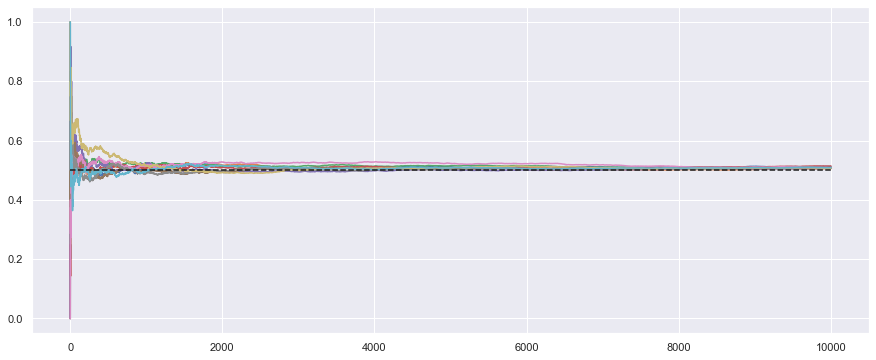

In [24]:
jurors_proba = 0.51
num_jurors = 10; num_trals = 10000 
num_decisions=(np.random.rand(num_trals, num_jurors)<jurors_proba)*1
total_trials = np.arange(1, num_trals+1).reshape(-1, 1)
cum_right_ratio=np.cumsum(num_decisions, axis=0)/total_trials
plt.figure(figsize=(15,6)); plt.plot(cum_right_ratio)
plt.plot([0, num_trals], [0.5, 0.5], 'k--', label='50%')

## Bootstrap
- N개의 표본에서 K를 복원추출방식으로 재표본 추출(resampling)이 Bootstrapping
- N=100인 표본에서 200회 재표본(K=100) 부트스트래핑하면 관측치가 100개인 200개의 표본이 생성

#### 표본(sample)에서 부트스트래핑 추출 회수를 늘리면 신뢰구간이 좁아지고 중심극한 정리에 따른다.
표본의 추출 개수가 아주 적은 경우 표본이 정규분포를 따른다고 가정할 수 없다.
표본을 resampling한 부트스트래핑은 중심극한 정리에 따라 샘플의 수가 증가하게 되어 정규분포를 따른다고 가정하면
각종 통계량 분석이 가능

In [25]:
n = 10000
trials = 10000
print(f'1 회 비복원추출시 뽑힐 확률은 {1/n}')
print(f'1 회 비복원추출시 안 뽑힐 확률은 {(1-1/n)}')
print(f'{trials}번 비복원 추출시 계속 안 뽑힐 확률은 {(1-1/n)**trials}')

1 회 비복원추출시 뽑힐 확률은 0.0001
1 회 비복원추출시 안 뽑힐 확률은 0.9999
10000번 비복원 추출시 계속 안 뽑힐 확률은 0.36786104643297046


### 신뢰구간과 bootstrapping (중심극한 정리, Central Limit Theorem)

In [26]:
n =100
population = np.arange(1,n+1)# population size
sample = np.random.choice(population, (1, int(n/5)), replace=False)
sample
sample.mean()

array([[19,  2, 75, 40,  5, 66, 48,  1, 87, 17, 30, 69, 52, 92, 74,  9,
        91,  4, 29, 27]])

41.85

1 부터 100까지 순번을 가진 자료 모집단에서, 20개를 표본추출
모집단_평균50.5, 표본_평균41.85
부트스트랩 샘플 20개로, 2000번 재표본_평균 42.06885


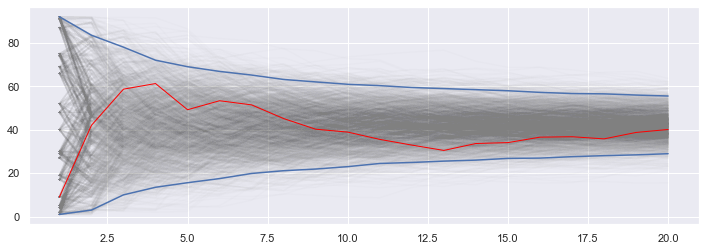

In [27]:
repetitions = 2000 # 복원추출 회수(반복 회수)
select_num = int(n/5) # 복원추출 재표본 개수
boost = np.random.choice(np.squeeze(sample), 
                         (select_num, repetitions), replace=True)
print(f'1 부터 {n}까지 순번을 가진 자료 모집단에서, {int(n/5)}개를 표본추출')
print(f'모집단_평균{population.mean()}, 표본_평균{sample.mean()}')
print(f'부트스트랩 샘플 {select_num}개로, {repetitions}번 재표본_평균 {boost.mean()}')

yb = 1/np.arange(1, select_num+1)[:, None] * np.cumsum(boost, axis=0)
plt.figure(figsize=(12,4))
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)
plt.plot(np.arange(1, select_num+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, select_num+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, select_num+1), upper, 'b',#
         np.arange(1, select_num+1), lower, 'b');